<a href="https://colab.research.google.com/github/JakeOh/202505_BD50/blob/main/lab_da/da06_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA(Exploratory Data Analysis)

탐색적 데이터 분석: 그래프나 통계적인 방법으로 자료를 분석하는 과정.

# 필요한 모듈 import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Ex 1. iris 데이터셋

*   seaborn 패키지의  iris 데이터셋을 로드
*   iris 데이터 탐색 - 데이터프레임 일부 출력, 요약 정보, 기술 통계량, 카테고리 타입 변수 빈도수
*   숫자 타입 변수(컬럼)들의 box plot
*   숫자 타입 변수(컬럼)들의 평균 막대 그래프
*   품종별 모든 연속형 변수들의 box plot
*   품종별 모든 연속형 변수들의 평균 막대 그래프
*   petal_width ~ petal_length 산점도. 품종별로 색깔을 다르게 시각화
*   모든 연속형 변수들 간의 상관관계(산점도). Hint: `pairplot()`


## 데이터셋 준비

In [2]:
iris = sns.load_dataset('iris')

In [3]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
iris.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


## 숫자 타입 변수(numerical variables) 탐색

In [6]:
iris.petal_length.describe()

,petal_length
count,150.000000
mean,3.758000
std,1.765298
min,1.000000
25%,1.600000
50%,4.350000
75%,5.100000
max,6.900000


In [7]:
iris[['petal_length', 'petal_width']].describe()

,petal_length,petal_width
count,150.000000,150.000000
mean,3.758000,1.199333
std,1.765298,0.762238
min,1.000000,0.100000
25%,1.600000,0.300000
50%,4.350000,1.300000
75%,5.100000,1.800000
max,6.900000,2.500000


In [8]:
# 숫자 타입 변수들의 기술 통계량
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


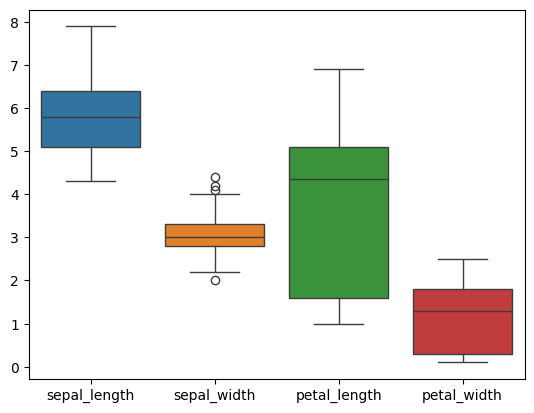

In [9]:
# box plot
sns.boxplot(data=iris)
plt.show()

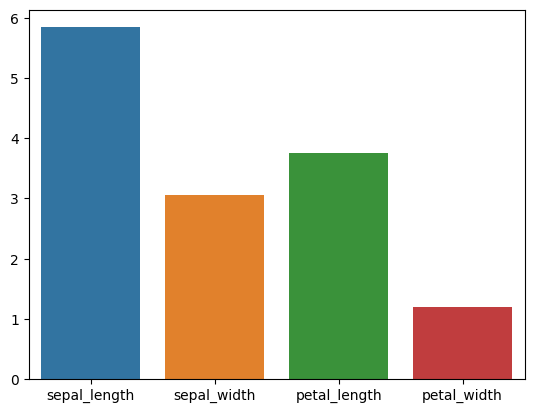

In [10]:
# (mean) bar plot
sns.barplot(data=iris, errorbar=None)
plt.show()

In [11]:
print(iris.columns)
print(iris.columns[:4])  # 첫 4개의 컬럼 이름을 선택
print(iris.columns[:-1])  # 마지막 컬럼을 제외한 나머지 모든 컬럼 이름을 선택

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')


In [12]:
# iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].mean()
iris[iris.columns[:-1]].mean()

,0
sepal_length,5.843333
sepal_width,3.057333
petal_length,3.758000
petal_width,1.199333


## 품종별 분석

In [13]:
# 카테고리 변수의 빈도수
iris.species.value_counts()

,count
species,
setosa,50
versicolor,50
virginica,50


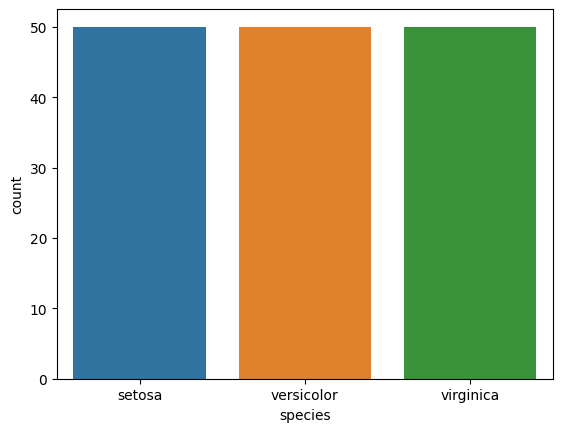

In [14]:
sns.countplot(data=iris, x='species', hue='species')
plt.show()

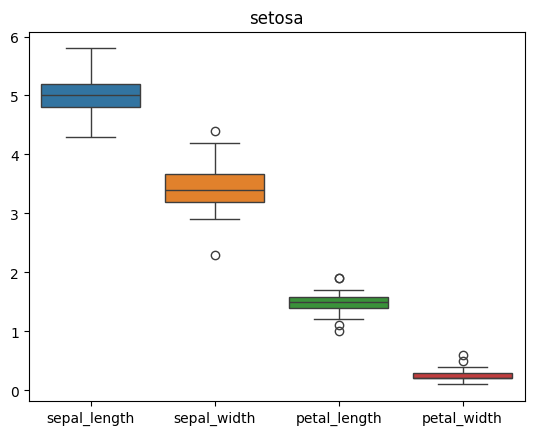

In [15]:
sns.boxplot(data=iris[iris.species == 'setosa'])
plt.title('setosa')
plt.show()

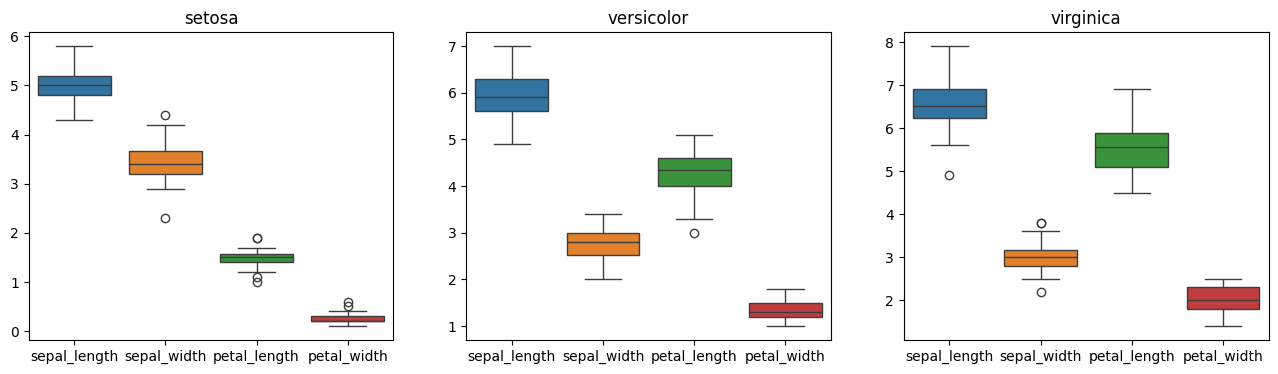

In [16]:
# 품종별 box plot
species = iris.species.unique()

fig, axes = plt.subplots(ncols=len(species), figsize=(16,4))

for i, s in enumerate(species):
    data = iris[iris.species == s]
    sns.boxplot(data=data, ax=axes[i])
    axes[i].set_title(s)

plt.show()

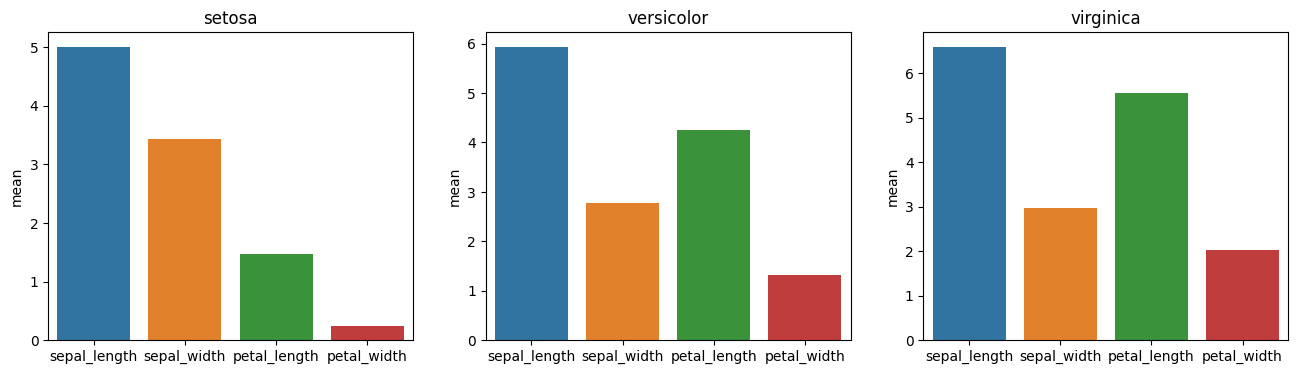

In [17]:
# 품종별 평균 막대 그래프
species = iris.species.unique()

fig, axes = plt.subplots(ncols=len(species), figsize=(16, 4))
for i, s in enumerate(species):
    data = iris[iris.species == s]
    sns.barplot(data=data, ax=axes[i], errorbar=None)
    axes[i].set_title(s)
    axes[i].set_ylabel('mean')

plt.show()

In [18]:
print(iris.columns)
print(iris.columns[:-1])

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')


In [19]:
iris.groupby(by=['species'])[iris.columns[:-1]].mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


## scatter plot

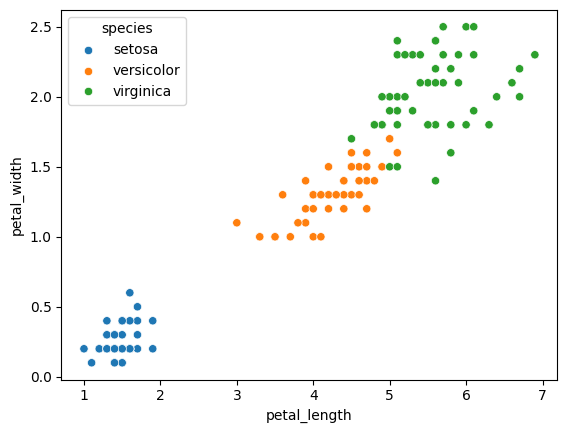

In [20]:
# petal_width ~ petal_length
sns.scatterplot(data=iris, x='petal_length', y='petal_width', hue='species')
plt.show()

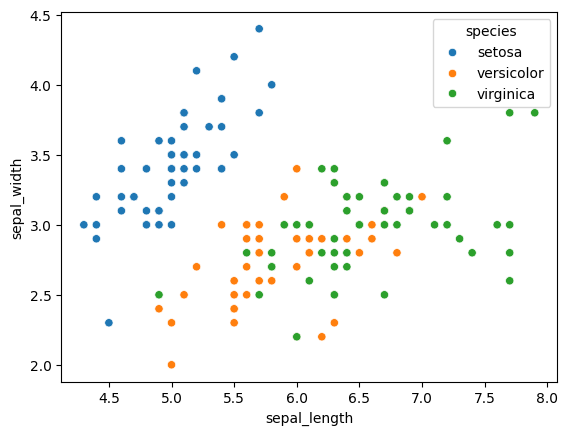

In [21]:
# sepal_width ~ sepal_length
sns.scatterplot(data=iris, x='sepal_length', y='sepal_width', hue='species')
plt.show()

## pair plot

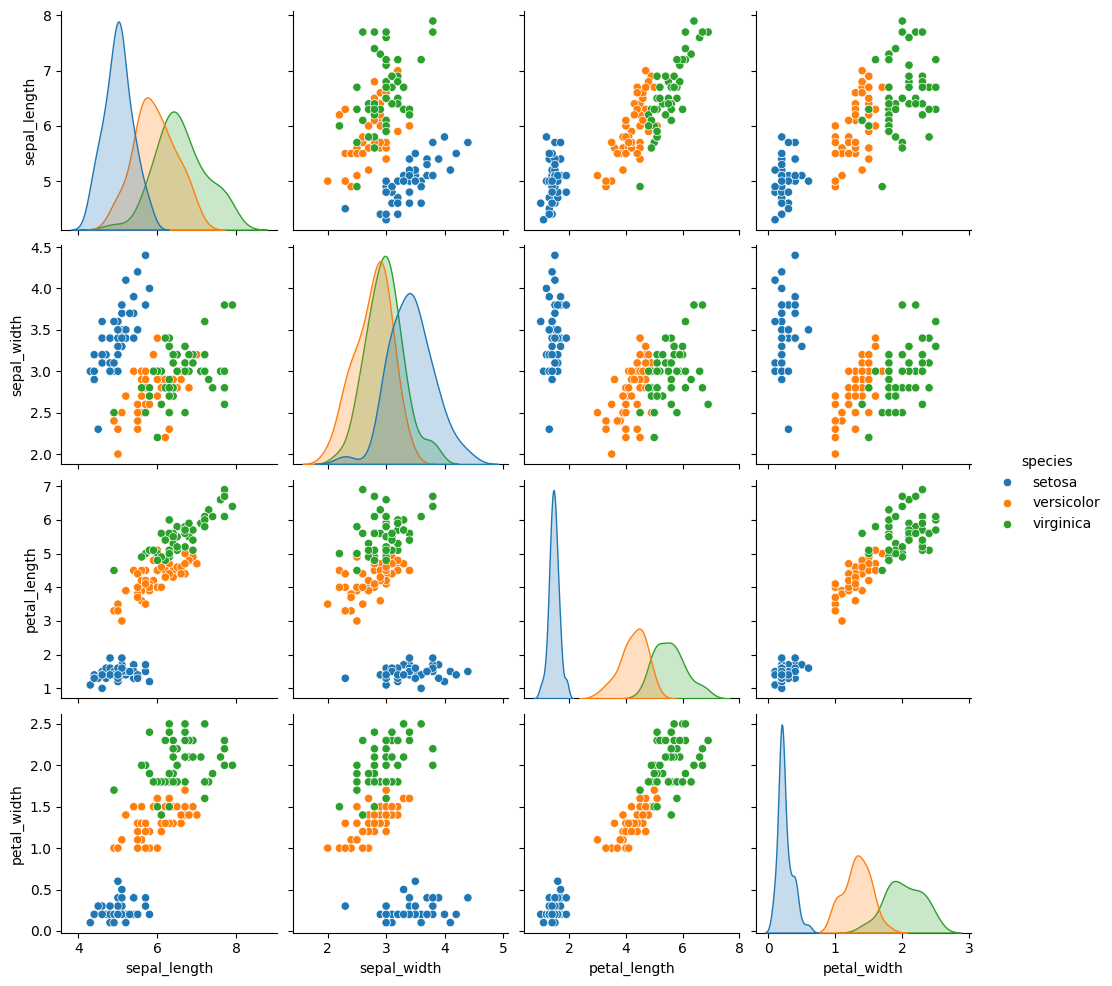

In [22]:
sns.pairplot(data=iris, hue='species')
plt.show()

# Ex 2. mpg 데이터셋

*   seaborn 패키지의 예제 데이터 셋 'mpg'를 로드해서 DataFrame 생성
*   DataFrame 탐색 - 출력, 요약 정보, 숫자 타입 기술 통계량, 카테고리 타입 빈도수
*   산점도
    *   mpg(연비) ~ displacement(배기량)
    *   2x2 모양의 subplot을 생성
        *   mpg ~ cylinders(실린더 개수)
        *   mpg ~ horsepower(마력)
        *   mpg ~ weight(무게)
        *   mpg ~ acceleration(가속도)
*   빈도수 막대 그래프
    *   cyliners 빈도수
    *   origin(자동차 생산 지역) 빈도수
    *   model_year(자동차 생산 연도) 빈도수
        *   선 그래프 가능?
    *   origin 별, cylinders 별 빈도수
*   통계량 막대 그래프 - 2개의 subplot 생성
    *   cylinders 별 mpg의 중앙값(median)
    *   origin 별 mpg의 중앙값

*   Box plot
    *   3개의 subplot을 생성
        *   mpg, displacement, weight box plot
    *   origin 별 mpg box plot
*   Histogram
    *   4개의 subplot을 생성
        *   mpg, displacement, weight, model_year histogram
*   Pair plot

## 데이터셋 준비

In [23]:
# mpg(mile per gallon): 자동차 연비 단비. km/L
mpg = sns.load_dataset('mpg')

In [24]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [25]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [26]:
mpg.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger
397,31.0,4,119.0,82.0,2720,19.4,82,usa,chevy s-10


In [27]:
# 숫자 타입 변수들의 기술 통계량
mpg.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [28]:
mpg.origin.value_counts()

,count
origin,
usa,249
japan,79
europe,70


In [29]:
mpg.name.value_counts()

,count
name,
ford pinto,6
ford maverick,5
amc matador,5
toyota corolla,5
amc hornet,4
...,...
amc concord dl,1
volkswagen rabbit l,1
mazda glc custom l,1


In [30]:
mpg.cylinders.value_counts()

,count
cylinders,
4,204
8,103
6,84
3,4
5,3


In [31]:
mpg.model_year.value_counts()

,count
model_year,
73,40
78,36
76,34
82,31
75,30
80,29
79,29
81,29
70,29


# 산점도(Scatter plot)

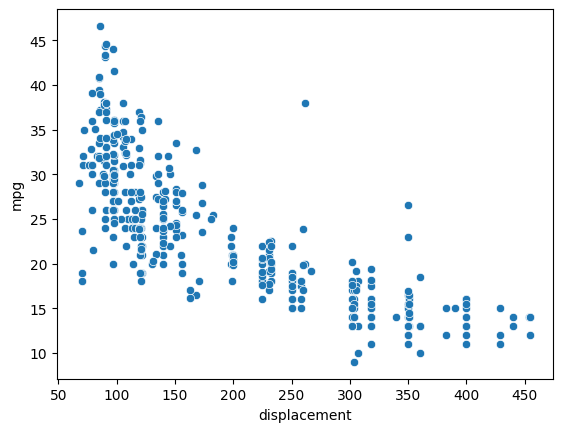

In [32]:
# mpg(연비) ~ displacement(배기량)
sns.scatterplot(data=mpg, x='displacement', y='mpg')
plt.show()

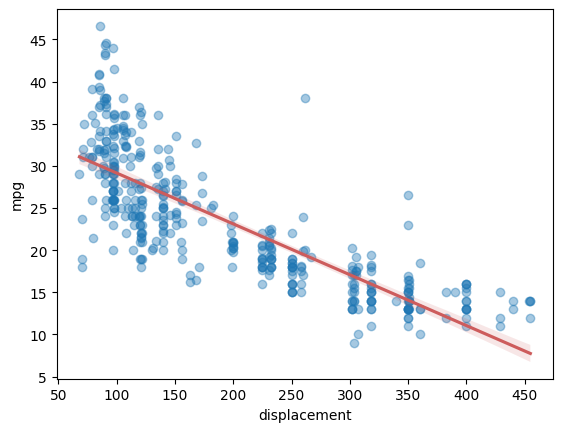

In [36]:
sns.regplot(data=mpg, x='displacement', y='mpg',
            scatter_kws={'alpha': 0.4}, line_kws={'color': 'IndianRed'})
plt.show()

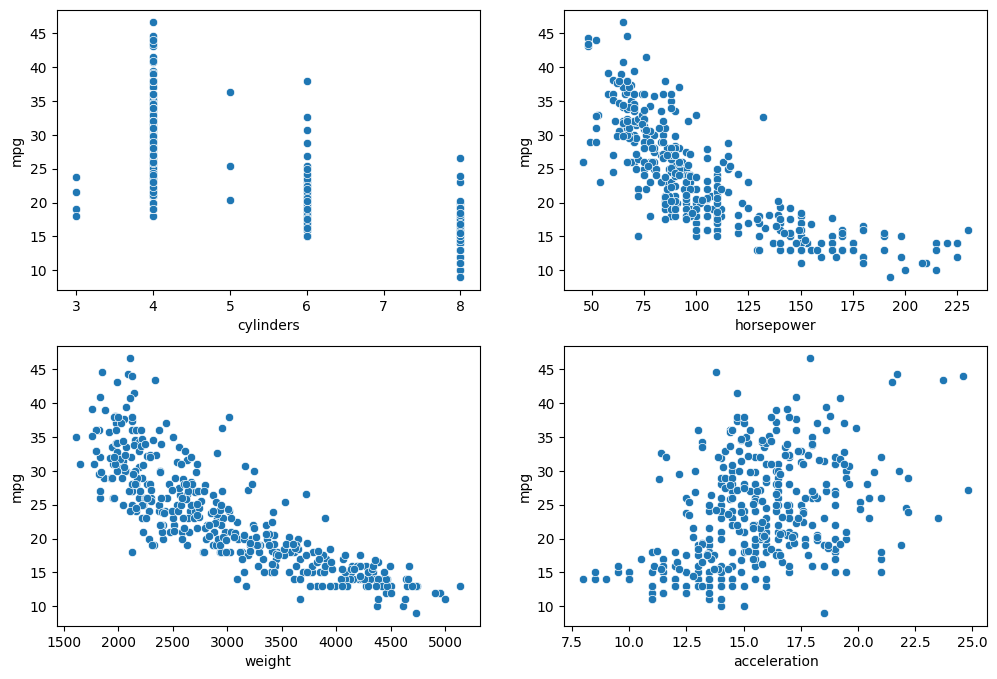

In [43]:
# 2x2 Axes를 생성, 산점도
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
# print(axes)  #> 2차원 ndarray

sns.scatterplot(data=mpg, x='cylinders', y='mpg', ax=axes[0, 0])
sns.scatterplot(data=mpg, x='horsepower', y='mpg', ax=axes[0, 1])
sns.scatterplot(data=mpg, x='weight', y='mpg', ax=axes[1, 0])
sns.scatterplot(data=mpg, x='acceleration', y='mpg', ax=axes[1, 1])

plt.show()

In [45]:
# 상관계수(correlation coefficient)
# pd.DataFrame.corr() 메서드의 method 파라미터: 상관계수를 계산하는 방법(pearson, kendall, spearman)
mpg[['mpg', 'displacement', 'horsepower', 'weight', 'acceleration']].corr()

,mpg,displacement,horsepower,weight,acceleration
mpg,1.000000,-0.804203,-0.778427,-0.831741,0.420289
displacement,-0.804203,1.000000,0.897257,0.932824,-0.543684
horsepower,-0.778427,0.897257,1.000000,0.864538,-0.689196
weight,-0.831741,0.932824,0.864538,1.000000,-0.417457
acceleration,0.420289,-0.543684,-0.689196,-0.417457,1.000000


In [46]:
mpg[['mpg', 'displacement', 'horsepower', 'weight', 'acceleration']].corr(method='spearman')

,mpg,displacement,horsepower,weight,acceleration
mpg,1.000000,-0.855692,-0.853616,-0.874947,0.438677
displacement,-0.855692,1.000000,0.876171,0.945986,-0.496512
horsepower,-0.853616,0.876171,1.000000,0.878819,-0.658142
weight,-0.874947,0.945986,0.878819,1.000000,-0.404550
acceleration,0.438677,-0.496512,-0.658142,-0.404550,1.000000


### 지역, 실린더 개수를 산점도에 표현

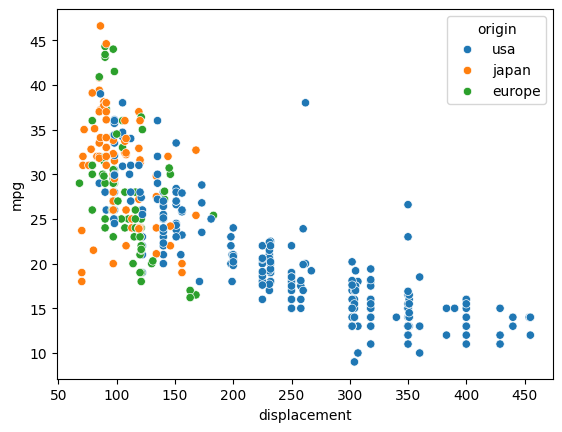

In [47]:
sns.scatterplot(data=mpg, x='displacement', y='mpg', hue='origin')
plt.show()

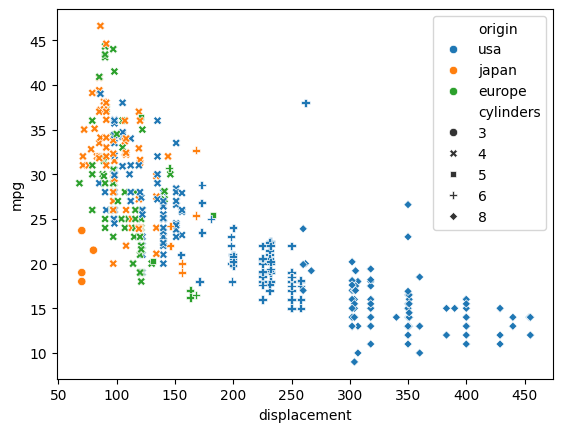

In [51]:
sns.scatterplot(data=mpg, x='displacement', y='mpg', hue='origin', style='cylinders')
plt.show()

In [52]:
fig = px.scatter(data_frame=mpg, x='displacement', y='mpg', color='origin', symbol='cylinders')
fig.show()

## count plot

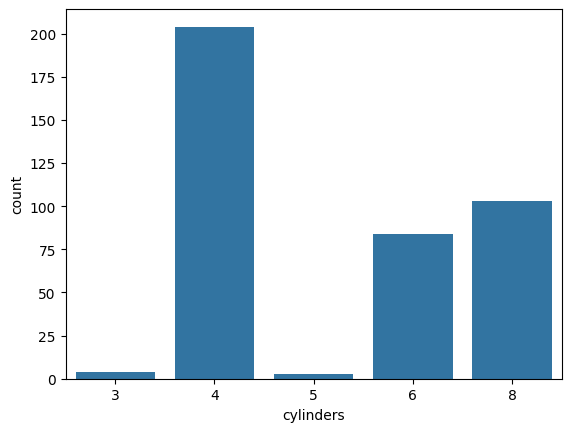

In [53]:
sns.countplot(data=mpg, x='cylinders')
plt.show()

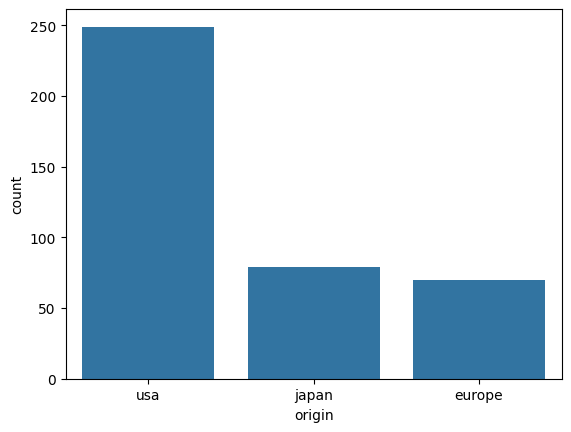

In [54]:
sns.countplot(data=mpg, x='origin')
plt.show()

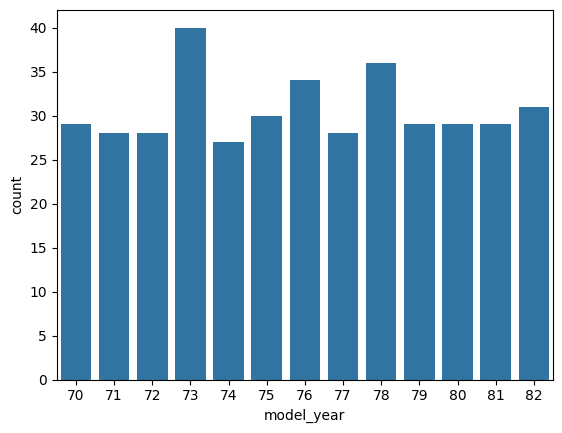

In [55]:
sns.countplot(data=mpg, x='model_year')
plt.show()

In [72]:
year_count = mpg.model_year.value_counts().sort_index()
year_count

,count
model_year,
70,29
71,28
72,28
73,40
74,27
75,30
76,34
77,28
78,36


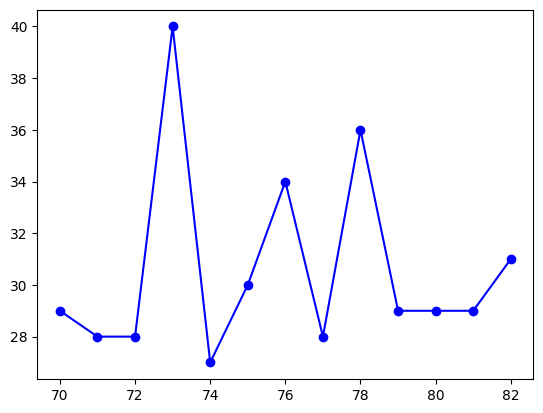

In [73]:
plt.plot(year_count.index, year_count.values, 'bo-')
plt.show()

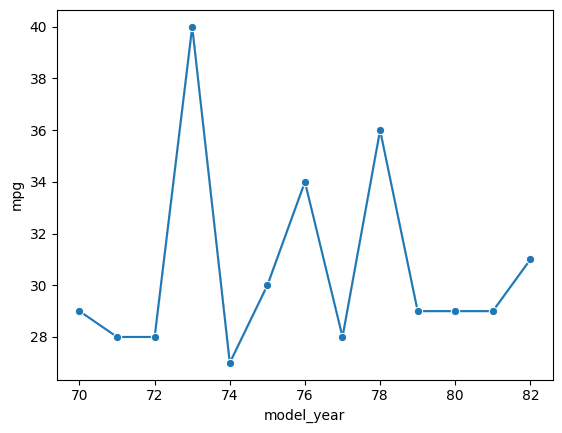

In [74]:
sns.lineplot(data=mpg, x='model_year', y='mpg', estimator='size', marker='o')
plt.show()

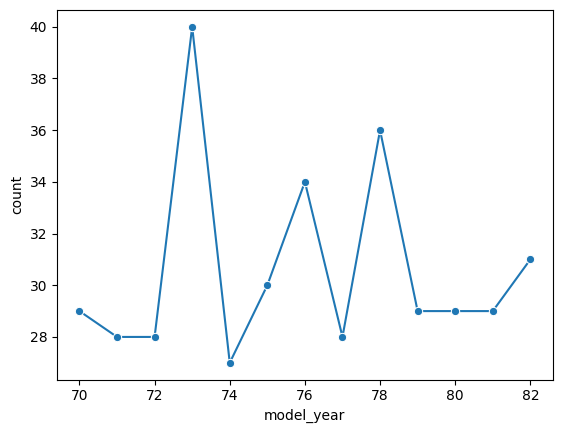

In [75]:
sns.lineplot(data=year_count, marker='o')
plt.show()